It is Unsupervised Learning Method

1. Goal is to Group / Cluster the observations
2. Less Variance within the cluster and more Variance between Clusters
3. we measure the observation point with all the centroid, and assign the point to the nearest centroid
4. Use Euclidean Distance

SKLEARN.CLUSTER.KMEANS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('Data_Set/health_data.csv')

In [3]:
data.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.3 KB


In [5]:
# we will drop the NAN values with 

data.columns = map(str.upper, data.columns)

data = data.dropna()

data.head()     # changes the data memory usage

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [7]:
cluster = data[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','COCEVER1',\
                'VIOL1','DEP1', 'ESTEEM1', 'SCHCONN1','PARACTV', 'PARPRES', 'FAMCONCT']]

cluster.head()

,ALCEVR1,MAREVER1,ALCPROBS1,DEVIANT1,COCEVER1,VIOL1,DEP1,ESTEEM1,SCHCONN1,PARACTV,PARPRES,FAMCONCT
1,1.0,0,1,5.0,0,1.0,17.0,35.0,22.0,9.0,15.0,23.3
3,0.0,1,0,4.0,1,4.0,19.0,47.0,19.0,6.0,14.0,18.7
5,0.0,0,0,0.0,0,3.0,8.0,41.0,27.0,3.0,13.0,23.7
6,0.0,0,0,7.0,0,5.0,4.0,42.0,18.0,6.0,13.0,24.7
7,1.0,1,0,6.0,0,8.0,4.0,40.0,20.0,10.0,14.0,22.3


In [8]:
# we have to standardize the distance calculation of the model 
# we standardize to mean = 0 and standard deviation = 1

cluster_s = cluster.copy()

# we take each of the feature (class name) and apply the scale method to get mean=0 and SD=1
# we are now standardizing the clustering variables
a=['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','COCEVER1',\
                'VIOL1','DEP1', 'ESTEEM1', 'SCHCONN1','PARACTV', 'PARPRES', 'FAMCONCT']
for i, val in enumerate(a):
    cluster_s[val] = preprocessing.scale(cluster_s[val].astype('float64'))

cluster_s.head()

,ALCEVR1,MAREVER1,ALCPROBS1,DEVIANT1,COCEVER1,VIOL1,DEP1,ESTEEM1,SCHCONN1,PARACTV,PARPRES,FAMCONCT
1,0.947683,-0.564215,0.707020,0.670775,-0.184838,-0.238134,1.286259,-1.104733,-1.230181,0.806442,0.766295,0.277586
3,-1.055206,1.772375,-0.412003,0.386277,5.410151,0.919248,1.590171,1.122320,-1.811019,-0.085920,0.287126,-1.484243
5,-1.055206,-0.564215,-0.412003,-0.751716,-0.184838,0.533454,-0.081345,0.008793,-0.262119,-0.978282,-0.192042,0.430788
6,-1.055206,-0.564215,-0.412003,1.239771,-0.184838,1.305042,-0.689169,0.194381,-2.004631,-0.085920,-0.192042,0.813795
7,0.947683,1.772375,-0.412003,0.955273,-0.184838,2.462425,-0.689169,-0.176794,-1.617406,1.103896,0.287126,-0.105420



# K Mean cluster Analysis
we will calculate the average distance from the centroids and we will plot the average distance

In [9]:
cluster_train, cluster_test = train_test_split(cluster_s,test_size=0.3, random_state = 222)

print(cluster_train.shape, cluster_test.shape)

(3220, 12) (1381, 12)


In [10]:
from scipy.spatial.distance import cdist

clusters = range(1,11)
mean_dist =  []

In [11]:
for k in clusters:
    Model1 = KMeans(n_clusters = k)
    Model1.fit(cluster_train)
    
    E_dist = cdist(cluster_train, Model1.cluster_centers_, 'euclidean')  # calculating the distance
    min_dist = np.min(cdist(cluster_train, Model1.cluster_centers_, 'euclidean'), axis =1)  # calculate the minimum distance
    mean_dist.append(sum(min_dist)/cluster_train.shape[0])

# Model1.cluster_centers_ calculate the centroid

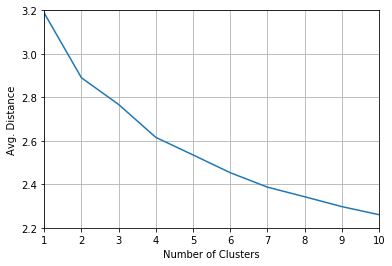

In [12]:
# Elbow Curve => will give us the decrease in the average minimum distance

plt.plot(clusters, mean_dist)
plt.xlabel('Number of Clusters')
plt.ylabel('Avg. Distance')
plt.axis([1,10,2.2,3.2])
plt.grid()

The above shows that, as the number of clusters increase the average distance between the clusters decreases


Then Bend appears when number of clusters is k = 2 & 4
* We cannot show using Scatter plot, as we have 11 clusters => so it will be 11 dimensions
* Therefore use Conanical Discriminate Analysis
* PCA does this
* 
* we will deploy this process for K=2 and K=3

In [13]:

K=2  # 2 clusters solution

In [14]:
from sklearn.decomposition import PCA

In [15]:
# consider for K=2
Model_1 = KMeans(n_clusters = 3)
Model_1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
pca_k2 = PCA(2) # it asks for only 2 canonical variables

pca_k2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

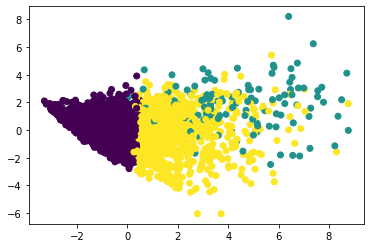

In [17]:
plot_col = pca_k2.fit_transform(cluster_train)
plt.scatter(x = plot_col[:,0], y = plot_col[:,1], c=Model_1.labels_)

# Model_K2.labels_ => tells to color code the clusters

In [18]:
# it shows that, between the clusters we can say that, the clusters are highly related